In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
mpl.style.use('seaborn')
mpl.style.use('seaborn-muted')
from scipy.optimize import curve_fit

In [33]:
with open('device_13_2_3in4out.npy', 'rb') as f:
    wl = np.load(f)
    pd0 = np.load(f)

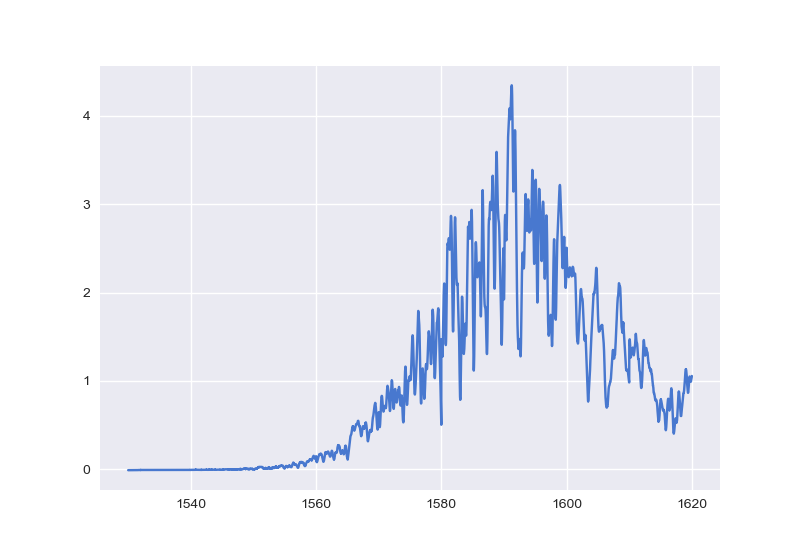

In [34]:
plt.figure()
plt.plot(wl, pd0)

(array([54700, 54701, 54702, 54703, 54704, 54705, 54706, 54707, 54708,
       54709, 54710, 54711, 54712, 54713, 54714, 54715, 54716, 54717,
       54718, 54719, 54720, 54721, 54722, 54723, 54724, 54725, 54726,
       54727, 54728, 54729, 54730, 54731, 54732, 54733, 54734, 54735,
       54736, 54737, 54738, 54739, 54740, 54741, 54742, 54743, 54744,
       54745, 54746, 54747, 54748, 54749, 54750, 54751, 54752, 54753,
       54754, 54755, 54756, 54757, 54758, 54759, 54760, 54761, 54762,
       54763, 54764, 54765, 54766, 54767, 54768, 54769, 54770, 54771,
       54772, 54773, 54774, 54775, 54776, 54777, 54778, 54779, 54780,
       54781, 54782, 54783, 54784, 54785, 54786, 54787, 54788, 54789,
       54790, 54791, 54792, 54793, 54794, 54795, 54796, 54797, 54798,
       54799, 54800, 54801, 54802, 54803, 54804, 54805, 54806, 54807,
       54808, 54809, 54810, 54811, 54812, 54813, 54814, 54815, 54816,
       54817, 54818, 54819, 54820, 54821, 54822, 54823, 54824, 54825,
       54826, 54827

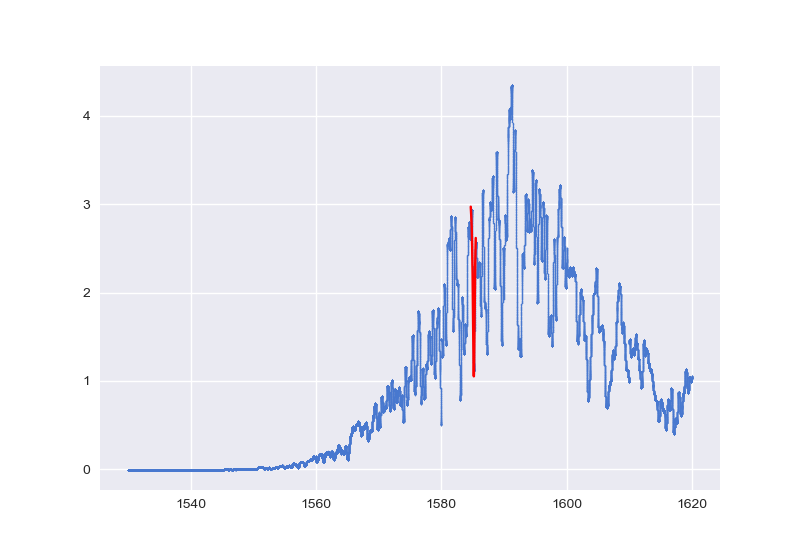

In [38]:
def lorentzian_inv( x, x0, a, gam ):
    return a - (a * (gam/2)**2 / ( (gam/2)**2 + ( x - x0 )**2) )
#Find the start of the index(returns a list)
start = np.where(abs(wl-1584.8) < 0.1 ) #2.5555/2.5580
end = np.where(abs(wl-1585.6) < 0.1 )
#Load x and y data
print(start)
x_data = wl[start[0][0]:end[0][0]]
print(x_data)
#y_data = abs(FD_D7[start[0][0]:end[0][0]])/max(abs(FD_D7[start[0][0]:end[0][0]]))
y_data = abs(pd0[start[0][0]:end[0][0]])
fix_x_cen = 1585.19 #2.55684
popt_fit, pcov_fit = curve_fit(lambda t, amp, gam, y_off, A:
                         lorentzian_inv( t, fix_x_cen, amp, gam ) + y_off + t*A,
                         x_data,
                         y_data,
                         p0=(0.001, 0.0005, 0.0019, 0),
                         maxfev=5000,
                         bounds=((0,  0, -np.inf, -np.inf),(np.inf, np.inf, np.inf, np.inf))
                        )
amp, gam, y_off, A = popt_fit
print(popt_fit)
print('Gamma= ', gam, 'nm')
print('Q=', fix_x_cen/gam)
fig = plt.figure()
ax = plt.subplot()
ax.scatter(wl, pd0, s = 0.5)
#ax.plot(x_data, lorentzian_inv( x_data, fix_x_cen, 0.0011, 0.001 ) + y_off + x_data*A, c=‘red’)
ax.plot(x_data, lorentzian_inv( x_data, fix_x_cen, amp, gam ) + y_off + x_data*A, c='red')
x1,x2,y1,y2 = ax.axis()
# ax.axis((2.50,2.6, 0.0 ,0.005))